# 1. Ingesta de librerías

In [337]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


# 2. Extracción de Archivo

In [338]:
df = pd.read_csv('df_final.csv')

# 3. Análisis de Datos Exploratorio

In [339]:
#Visualizamos tipo de datos y dimensión
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385173 entries, 0 to 385172
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   truck                      385173 non-null  object 
 1   loader                     385173 non-null  object 
 2   ton                        385173 non-null  float64
 3   n_shovel                   385173 non-null  int64  
 4   truck_total_cycle          385173 non-null  float64
 5   loader_total_cycle         385173 non-null  float64
 6   distance_empty             385173 non-null  float64
 7   distance_full              385173 non-null  float64
 8   date                       385173 non-null  object 
 9   ton_paladas                385173 non-null  float64
 10  relacion_carga_transporte  385173 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 32.3+ MB


Al ver los tipos de datos se tiene que date ha cambiado a object, por lo que nos aseguraremos que tenga formato de fecha

In [340]:
df['date'] = pd.to_datetime(df['date'])

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385173 entries, 0 to 385172
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   truck                      385173 non-null  object        
 1   loader                     385173 non-null  object        
 2   ton                        385173 non-null  float64       
 3   n_shovel                   385173 non-null  int64         
 4   truck_total_cycle          385173 non-null  float64       
 5   loader_total_cycle         385173 non-null  float64       
 6   distance_empty             385173 non-null  float64       
 7   distance_full              385173 non-null  float64       
 8   date                       385173 non-null  datetime64[ns]
 9   ton_paladas                385173 non-null  float64       
 10  relacion_carga_transporte  385173 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2

In [342]:
# Estadística descriptiva de las columnas numéricas
df.describe()

,ton,n_shovel,truck_total_cycle,loader_total_cycle,distance_empty,distance_full,date,ton_paladas,relacion_carga_transporte
count,385173.000000,385173.000000,385173.000000,385173.000000,385173.000000,385173.000000,385173,385173.000000,385173.000000
mean,317.913809,3.295867,2271.744766,303.984809,6112.456582,5742.353184,2023-10-01 08:24:43.393695744,98.255088,8.746271
min,268.990428,3.000000,711.000000,75.000000,515.000000,504.000000,2023-01-01 00:00:00,53.852615,1.227044
25%,305.727522,3.000000,1633.000000,218.000000,3919.000000,3749.000000,2023-05-23 00:00:00,87.281841,5.089172
50%,317.723155,3.000000,2123.000000,302.000000,5981.000000,5398.000000,2023-10-21 00:00:00,102.407123,7.394251
75%,329.980009,4.000000,2925.000000,388.000000,8039.000000,7780.000000,2024-02-05 00:00:00,107.499721,10.733096
max,366.808994,5.000000,4922.000000,647.000000,14254.000000,13860.000000,2024-05-24 00:00:00,122.269391,59.743902
std,17.674655,0.507299,804.443340,107.813533,2491.680896,2283.780978,NaN,12.874975,5.299254


In [343]:
# Estadística descriptiva de las columnas categoricas
df.describe(include='O')

,truck,loader
count,385173,385173
unique,47,4
top,CAEX66,PH58
freq,18020,122035


## 3.1 Analisis Univariado

### 3.1.1. Análisis Camiones

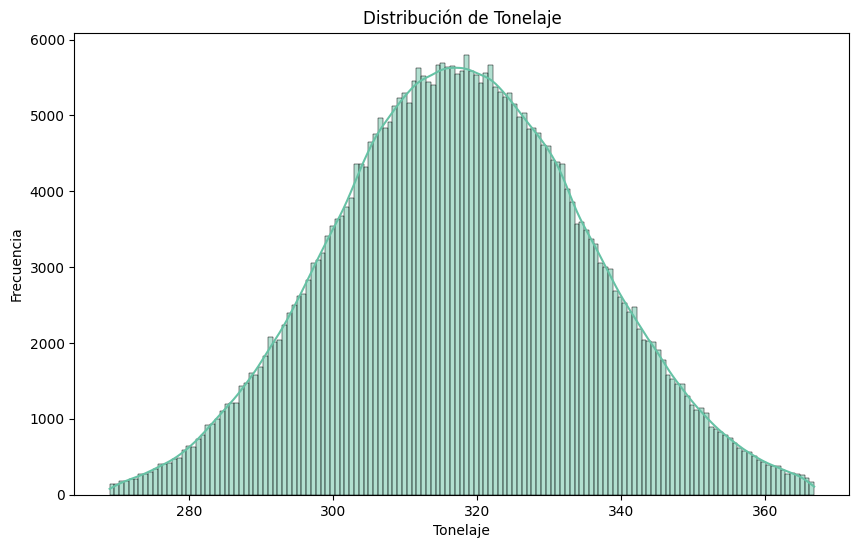

In [344]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ton'], kde=True)  
plt.title('Distribución de Tonelaje')
plt.xlabel('Tonelaje')
plt.ylabel('Frecuencia')
plt.show()

De la distribución del tonelaje podemos ver que tenemos una distribución normal (Campana de Gauss) lo cual nos indica que el camión se carga la amyoría de las veces cercano al valor promedio y las cargas con tonelajes muy altos o muy bajos son poco frecuentes.


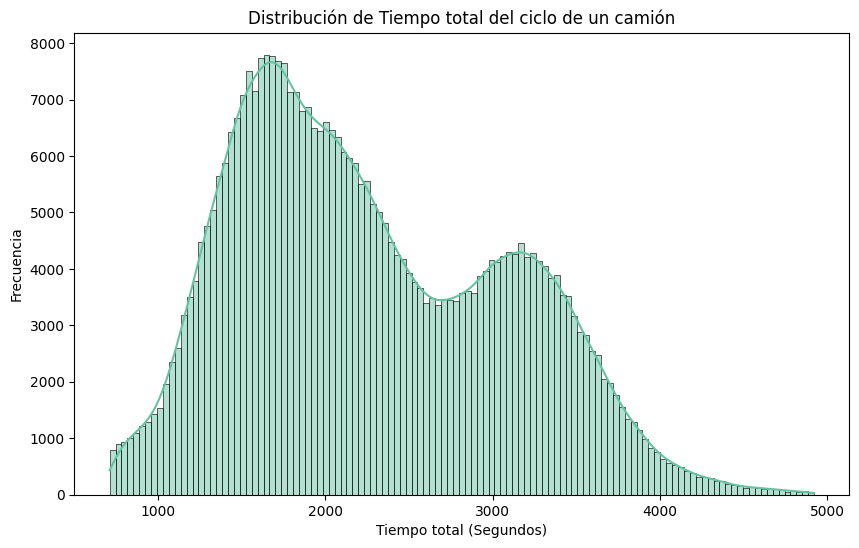

In [345]:
plt.figure(figsize=(10, 6))
sns.histplot(df['truck_total_cycle'], kde = True)  
plt.title('Distribución de Tiempo total del ciclo de un camión')
plt.xlabel('Tiempo total (Segundos)')
plt.ylabel('Frecuencia')
plt.show()

Del gráfico podemos ver que lamayoría de los ciclos del camión se completan en un tiempo relativamente corto, pero hay algunos ciclos que toman significativamente más tiempo, lo que genera la cola a la derecha del gráfico.

Posibles causas de la asimetría:

- Congestión en las rutas de transporte: Estas congestiones, especialmente en zonas de carguío y descarga, pueden aumentar el tiempo de espera y, por lo tanto, el tiempo total del ciclo.

- Problemas Operativos: Problemas de averías en camiones o problemas en las rutas pueden generar tiempos significamente mayores.

- Variabilidad en la velocidad del camión: la velocidad del camión se puede ver afectada por la pendiente del terreno, condiciones de la vía y la habiilidad que tenga el operador

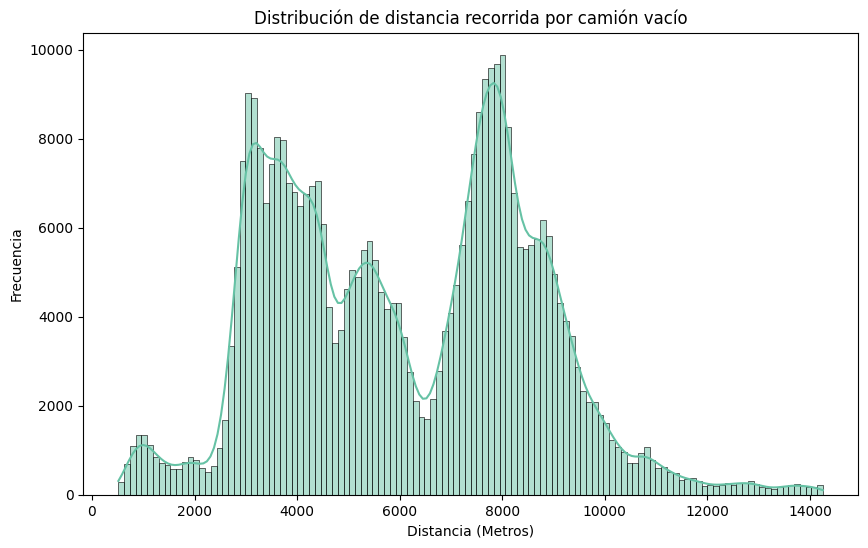

In [346]:
plt.figure(figsize=(10, 6))
sns.histplot(df['distance_empty'], kde = True)  
plt.title('Distribución de distancia recorrida por camión vacío')
plt.xlabel('Distancia (Metros)')
plt.ylabel('Frecuencia')
plt.show()

Del grafico se observa que no hay distribución normal ni una distribución simple. en cambio, parece una distribución bimodal con dos picos bien definidos, sugiriendo que existen dos patrones o modos de operación distintos en cuanto a la distancia recorrida por los camiones vacíos.

Posibles causas:

- Diferencias significativas entre los puntos de carga: dos o más puntos de carga ubicados a distancias significativamente diferentes del punto de descarga

- Cambios en la operacion: posible cambio en la ubicación de punto de carga o descarga y/o en las rutas de transporte.

- Combinación de rutas: podría ser que algunos camiones utilicen rutas cortas y otros rutas largas, combinando diferentes tareas de transporte.



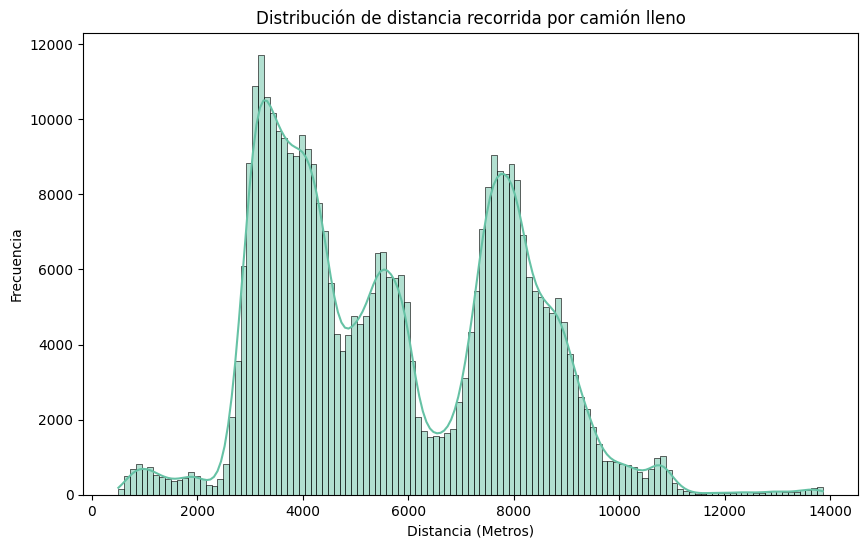

In [347]:
plt.figure(figsize=(10, 6))
sns.histplot(df['distance_full'], kde = True)  
plt.title('Distribución de distancia recorrida por camión lleno')
plt.xlabel('Distancia (Metros)')
plt.ylabel('Frecuencia')
plt.show()

en este caso tenemos una distribuión multimodal, con tres picos, lo cual indica tres patrones principales de distancia recorrida.

Posibles causas: 

- Multiples puntos de descarga: Es posible que xistan tres puntos de descarag principales ubicados a diferentes distancias del punto de carga.

- Diferente tipo de material: si se transportan diferentes tipo de material (Esteril o mineral) a diferentes puntos de descarga, esto odría generar la multimodalidad.

- Variación en rutas: podrían existir diferentes rutas para llegar a cada punto de descarga, lo que genera variaciones en la distancia recorrida:

- Combinación de tareas: algunos camiones podrían realizar tareas adicionales del transporte del material al punto de descarga principal aaumentando la distancia que se recorre en algunos ciclos.




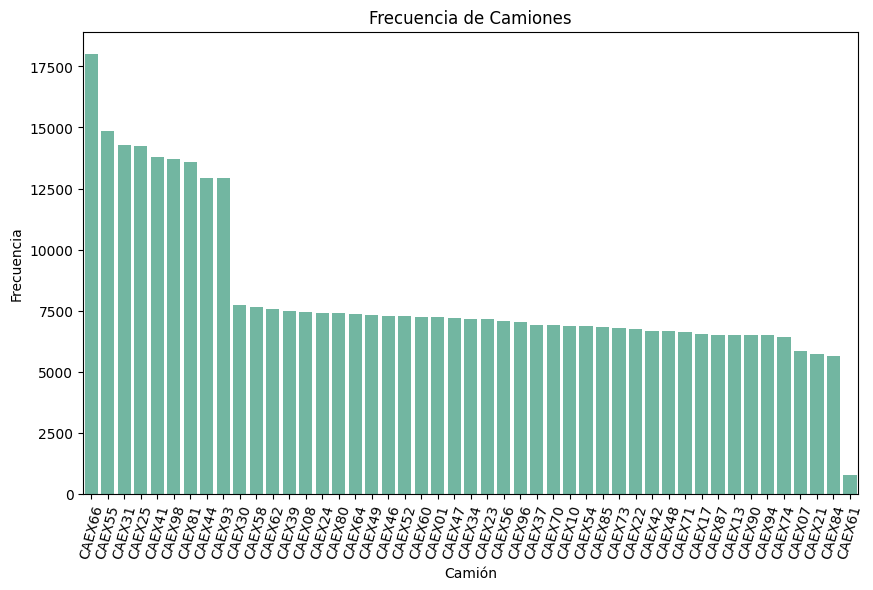

In [348]:
## Visualización de variables categóricas
plt.figure(figsize=(10, 6))
sns.countplot(x='truck', data=df, order= df['truck'].value_counts().index.tolist())
plt.title('Frecuencia de Camiones')
plt.xlabel('Camión')
plt.ylabel('Frecuencia')
plt.xticks(rotation=75)
plt.show()

Del grafico de frecuencia de camiones se evidencia una alta frecuencia del CAEX66, seguido del CAEX55, CAEX 31, CAEX 25, CAEX 41, CAEX 98, CAEX 81, CAEX 44 y CAEX 93 siendo estos una frecuencia casi similar. el ersto de los camiones presentan uan frecuencia similar aproximadamente de 7500 usos. además, se aprecia una muy baja frecuencia del CAEX 61, siento totalmente notorio en el gráfico:

Posibles causas:

- Disponibilidad: Algunos camiones pueden estar fuera de servicio por mantenimiento o reparaciones con mayor frecuencia, lo que reduce la disponibilidad y por ende, su frecuencia de uso.

- Asignación de tareas: La asignación de camiones a diferentes tareas dentro de la mina puede influir en su frecuencia de uso. algunos camiones pueden ser asignados a rutas más largas o a tareas más demandantes.

- Antiguedad: Los camiones nuevos pueden ser utilizados con mayor frecuencia debido a su mejor estado y tecnología.

### 3.1.2. Análisis de Palas

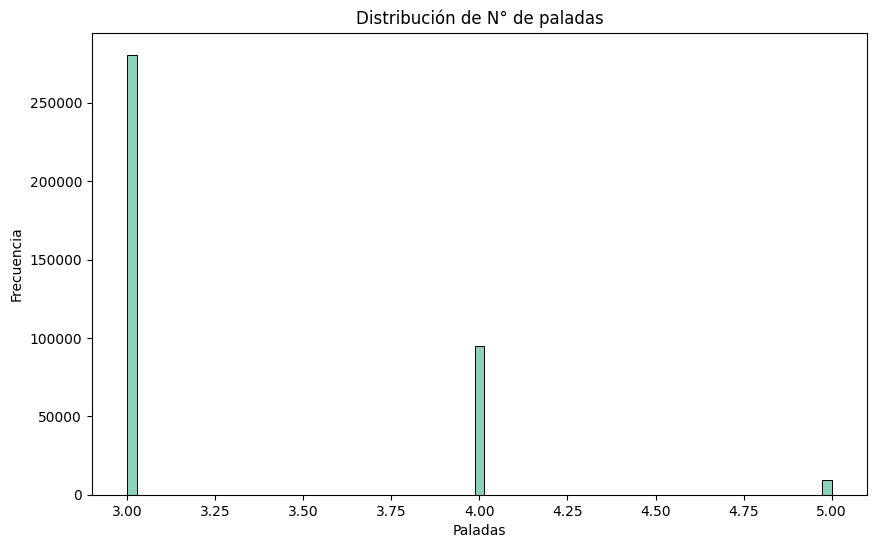

In [349]:
plt.figure(figsize=(10, 6))
sns.histplot(df['n_shovel'])  
plt.title('Distribución de N° de paladas')
plt.xlabel('Paladas')
plt.ylabel('Frecuencia')
plt.show()

De este gráfico se aprecia que la mayoria de los ciclos son realizados en 3 paladas, seguidas por 4 paladas y en su minoría con 5 paladas.

Posibles causas: 

- Diferentes densidades del material: DEnsidad del material que se carga peude influir ene l volumen que se puede cargar en cada palada

- Habilidad del operador: La experiencia y habilidad del operador puede afectar la cantidad de material que se carga en cada palada lo cual puede hacer que se aumenten las paladas



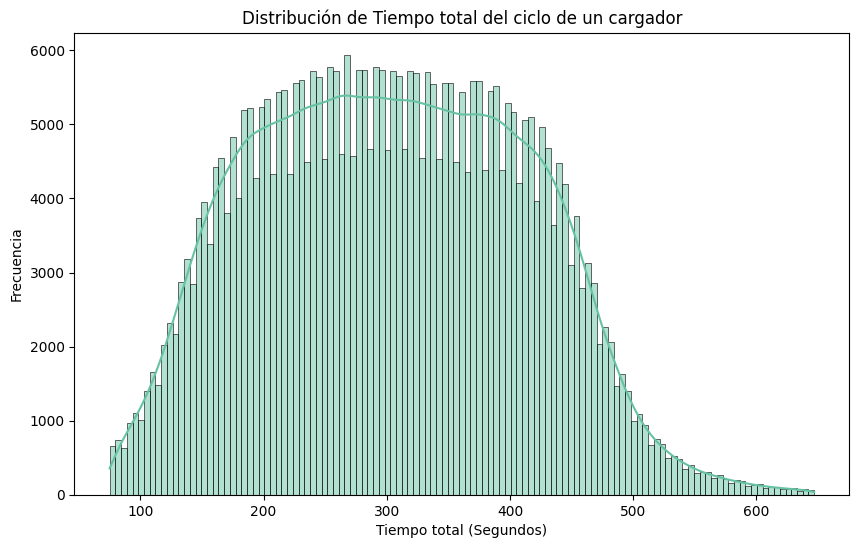

In [350]:
plt.figure(figsize=(10, 6))
sns.histplot(df['loader_total_cycle'], kde = True)  
plt.title('Distribución de Tiempo total del ciclo de un cargador')
plt.xlabel('Tiempo total (Segundos)')
plt.ylabel('Frecuencia')
plt.show()

En este caso tenemos una distribución asimétrica con cola hacia la derecha. indicando que la mayoría de los ciclos del cargados se completan en tiempos relativamente cortos, pero algunos ciclos toman muchisimo más tiempo del común.

Posibles causas:

- Variabilidad en el modelo de pala: El tener distintos modelos de paladas hace que se tengan distintas capacidades de carga y velocidad de ciclo distintas, lo que influye en el tiempo total

- Mantenimiento especifico de P&H: El estado de mantenimiento de componentes clave como el sistema eléctrico, motor diesel y el sistema hidráulico de las palas es crucial para un ciclo de tiempo optimo



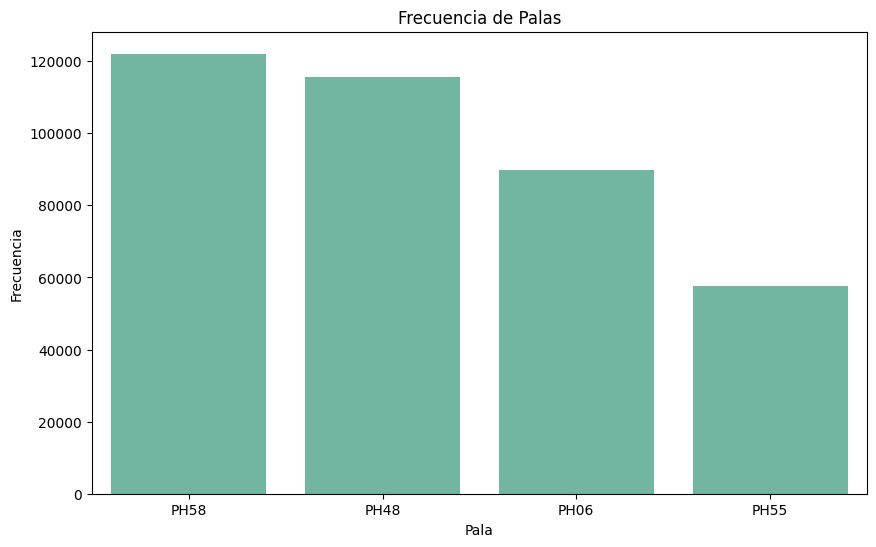

In [351]:
## Visualización de variables categóricas

plt.figure(figsize=(10, 6))
sns.countplot(x='loader', data=df, order = df['loader'].value_counts().index.tolist())  
plt.title('Frecuencia de Palas')
plt.xlabel('Pala')
plt.ylabel('Frecuencia')
plt.show()

## 3.2 Análisis Bivariado

### 3.2.1. Análisis Camiones

In [352]:
df_agrupado_camion = df.groupby('truck', as_index=False)['ton'].sum()
df_agrupado_camion = df_agrupado_camion.sort_values(by='ton', ascending=False)

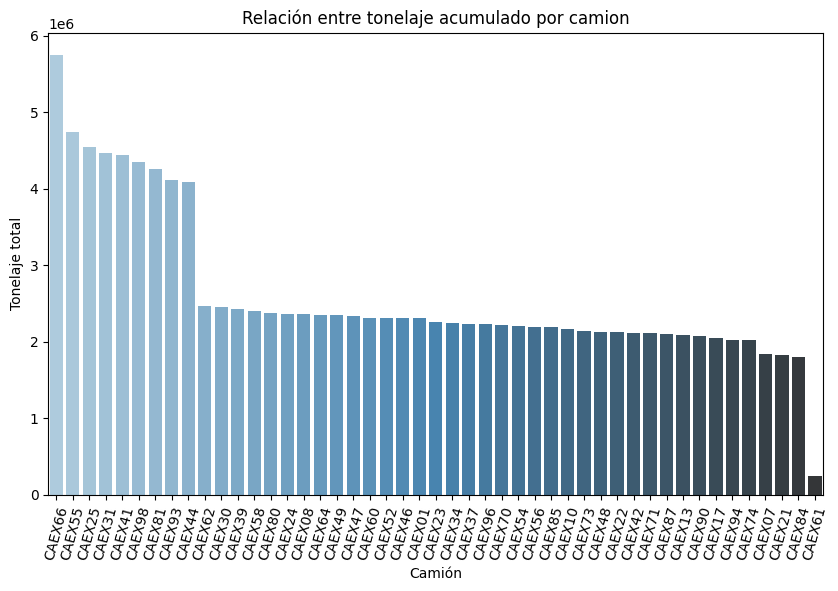

In [353]:
plt.figure(figsize=(10, 6))
sns.barplot(x='truck', y='ton', data=df_agrupado_camion, palette = 'Blues_d', hue='truck', legend=False)
plt.title('Relación entre tonelaje acumulado por camion')
plt.xlabel('Camión')
plt.ylabel('Tonelaje total')
plt.xticks(rotation=75)
plt.show()

En este gráfico se observa una gran variabilidad en el tonelaje acumulado para cada camión. algunos camiones como el CAEX66, CAEX55 y el CAEX 25, han transportando un tonelaje significativamente mayor que otros como el CAEX61, CAEX84 y el CAEX21

Posibles causas dela variabiilidad:

- Tiempo de uso: Los camiones que han estado en opreación por más tiempo habrán acumulado un mayor tonelaje

- Disponibilidad: Los camiones con mayor disponibiilidad, es decir, los que pasaron menos tiempo en mantenimiento o reparación tendrán la oportunidad de reportar más amterial.

- Asignación de tareas: Los camiones asignados a tareas más demandantes o a rutas más largas acumularán un menor tonelaje.

In [357]:
df.columns

Index(['truck', 'loader', 'ton', 'n_shovel', 'truck_total_cycle',
       'loader_total_cycle', 'distance_empty', 'distance_full', 'date',
       'ton_paladas', 'relacion_carga_transporte'],
      dtype='object')

In [374]:
df['ton_por_dia'] = df['ton']/(df['truck_total_cycle']/(60*60*60))
df_ton_ciclo_camion = df.groupby('truck', as_index=False)['ton_por_dia'].mean()
df_ton_ciclo_camion = df_ton_ciclo_camion.sort_values(by='ton_por_dia', ascending=False)

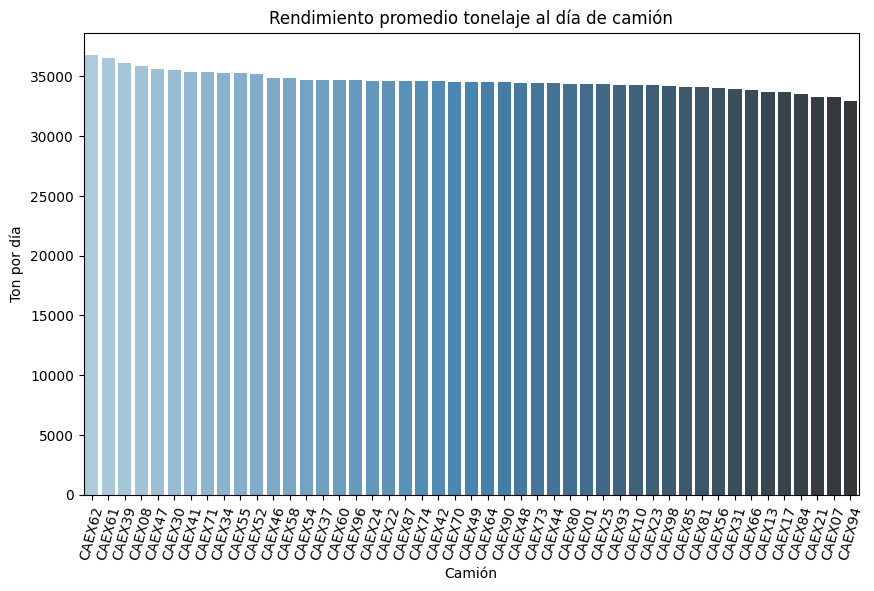

In [375]:
plt.figure(figsize=(10, 6))
sns.barplot(x='truck', y='ton_por_dia', data=df_ton_ciclo_camion, palette = 'Blues_d', hue='truck', legend=False)
plt.title('Rendimiento promedio tonelaje al día de camión')
plt.xlabel('Camión')
plt.ylabel('Ton por día')
plt.xticks(rotation=75)
plt.show()

Del grafico a simple vista se ven las barras similares pero, se obserav una leve variabilidad en el rendimiento promedio de tonelaje por ciclo entre los dierentes camiones caex, algunos como el caex62, caex61 y caex39 presentan un rendimiento ligeramente superior, mientras que otros como el caex 94 y caex 07 que tienen un rendimiento menor

posibles causas de la variabilidad:

- Eficiencia de carga: la habilidad del operador de la pada, la densidad del amterial yl eproceso de carga pueden influir en la cantidad de materialque se carga en cada mcamión.

- Condiciones dle terreno: Las condiciones del terreno, como la pendiente y la calidad de las vias pueden afectar la capacidad del camió para transportar su carga máxima.

- Tipo de material: densidad y tamaño del material transportado pueden influir en el tonelaje por ciclo

- estado dle camión: El estado mecánico del camión, incluyendo motor, transmisión y los neumáticos, pueden afectar su capacidad d carga y eficiencia

In [381]:
#Obtener el rendimiento de tonelaje por paladas de las palas que se encuentran trabajando y obtenemos un ranking de estas
df['tiempo_de_ciclo_minutos'] = df['truck_total_cycle']/(60)
df_tiempo_camion = df.groupby('truck', as_index=False)['tiempo_de_ciclo_minutos'].mean()
df_tiempo_camion = df_tiempo_camion.sort_values(by='tiempo_de_ciclo_minutos', ascending=True)

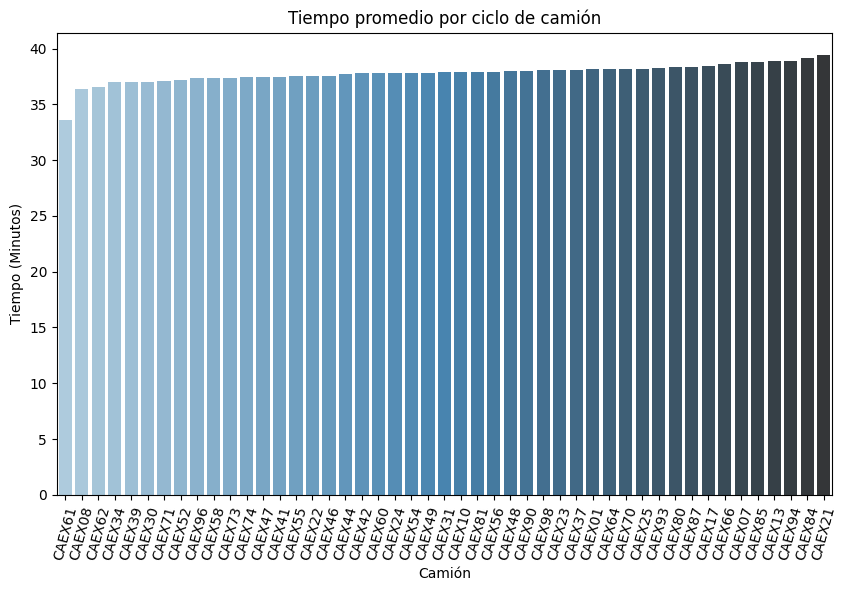

In [383]:
plt.figure(figsize=(10, 6))
sns.barplot(x='truck', y='tiempo_de_ciclo_minutos', data=df_tiempo_camion, palette = 'Blues_d', hue='truck', legend=False)
plt.title('Tiempo promedio por ciclo de camión')
plt.xlabel('Camión')
plt.ylabel('Tiempo (Minutos)')
plt.xticks(rotation=75)
plt.show()

Se tiene una cierta variabilidad donde los camiones como el caex 61, caex48 y caex30 tienen un tiempo de ciclo más corto y el caex 21, caex82 y caex44 tardan más en promedio

posibles causas:

- Distancia del ciclo: Los camiones que recorren distancias más largas entre el punto de carga, el punto de descarga y el punto de retorno tendrán más tiempo de ciclos mayores.

- Velocidad dl camión: La velocidad del camión puede verse afectada por factores com la potencia del motor, la capacidad de carga, las condiciones de la vía y la habilidad/experiencia del operador.

- Tiempos de espera: Los tiempos de espera en la cola de carga o descarga pueden aumentar significativamente el tiempo total del ciclo.

- Eficiencia en la carga y descarga:La velocidad y eficiencia en el proceso de carga y descarga pueden influir en el tiempo total del ciclo.

- Estado del camión el motor, la tranasmisión y los frenos pueden afectar a la velocidad y por lo tanto al tiempo de ciclo.

- Asignación de tareas: Los camiones asignados a tareas que impliquen mayores distancias o esperas tendrán tiempos de ciclo más largos.



### 3.2.2 Análisis Palas

In [324]:
#Obtener el rendimiento de tonelaje por paladas de las palas que se encuentran trabajando y obtenemos un ranking de estas
df_ton_paladas = df.groupby('loader', as_index=False)['ton_paladas'].mean()
df_ton_paladas = df_ton_paladas.sort_values(by='ton_paladas', ascending=False)

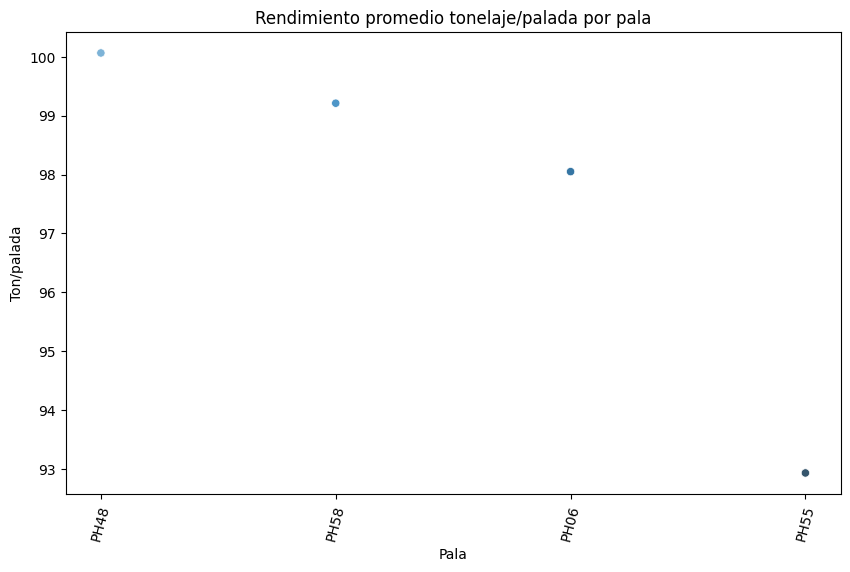

In [325]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loader', y='ton_paladas', data=df_ton_paladas, palette = 'Blues_d', hue='loader', legend=False)
plt.title('Rendimiento promedio tonelaje/palada por pala')
plt.xlabel('Pala')
plt.ylabel('Ton/palada')
plt.xticks(rotation=75)
plt.show()

del grafico de puntos se observa una variabilidad considerable en el rendimiento entre las palas. la pala PG48 tiene el rendimiento más alto, mientras que la pala PH 55 tiene el rendimiento más bajo.

Psobiles causas:

- Tipo de material: Densidad y tamño dle material quese está cargando puede influir en la cantidad de material que se puede cargar en cada palada.

- Condiciones del terreno dureza del material y la presencia de rocas, pueden afectar la eficiencia de la excavación y la cantidad de material cargado.

- Habilidad del operador: La experiencia y habilidad del operador de l a pala pueden influir en la cantidad de material que se carga en cada palada.

- Estado de la pala: El estado mecánico de la pala, incluyendo el sistema hidráulico y el balde, pueden afectar a su capacidad de carga.

In [326]:
df_ton_acum_pala = df.groupby('loader', as_index=False)['ton'].sum()
df_ton_acum_pala = df_ton_acum_pala.sort_values(by='ton', ascending=False)

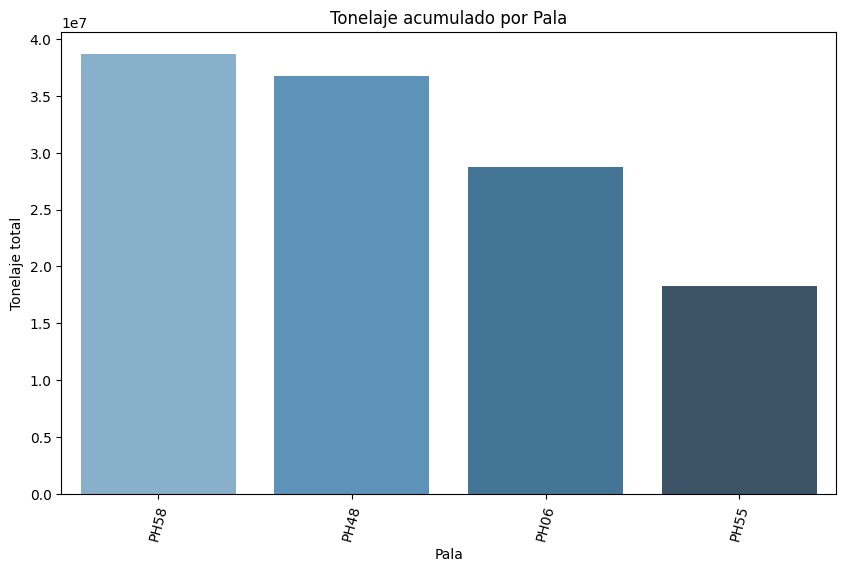

In [327]:
plt.figure(figsize=(10, 6))
sns.barplot(x='loader', y='ton', data=df_ton_acum_pala, palette = 'Blues_d', hue='loader', legend=False)
plt.title('Tonelaje acumulado por Pala')
plt.xlabel('Pala')
plt.ylabel('Tonelaje total')
plt.xticks(rotation=75)
plt.show()

Se obbserva una varaibilidad significativa en el teonlaje acumulado por cada pala. la pala PH58 ha movido la amyor cantidad de material, seguida de cerca de la PH48. la PH06 ha movido una cantidad considerablemente menor y la ph55 es la que menos tonelaje ha acumulado.

Posibles causas de la variabiilidad:

- Tiempo de uso: las palas que han estado en operación por más tiempo habrán acumulado un amyor tonelaje.

- disponibiilidad: las palas con menor tiempo en mantenimiento o reparación habrán tenido más tiempopara mover material.

- Asignación de tareas: Las palas asignadas a tareas más demandantes o a materiales más densos habrán acumulado un mayor tonelaje.

- Eficiencia: Las palas más eficientes en terminos de velocidad de ciclo y ocnsumo de combustible pueden mover más material en un mismo period de tiempo.


In [328]:
df_paladas_pala = df.groupby('loader', as_index=False)['n_shovel'].mean()
df_paladas_pala = df_paladas_pala.sort_values(by='n_shovel', ascending=False)

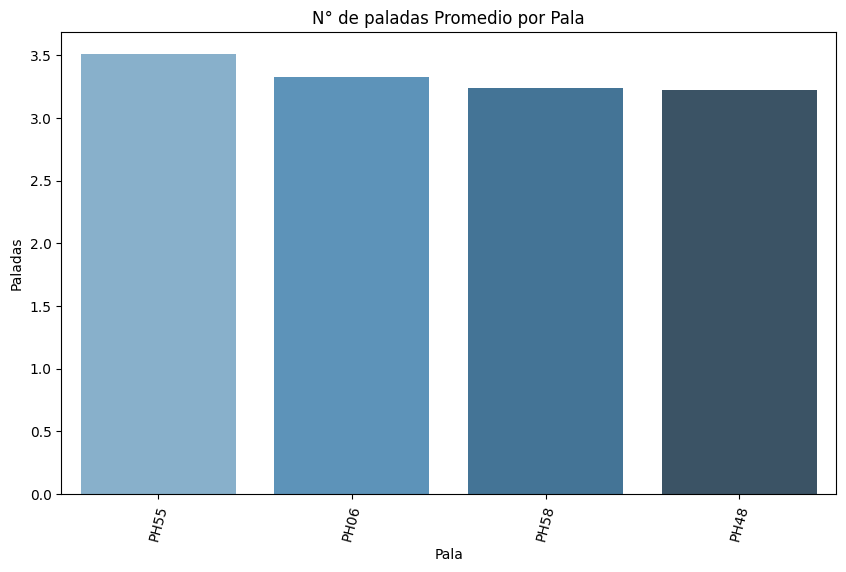

In [329]:
plt.figure(figsize=(10, 6))
sns.barplot(x='loader', y='n_shovel', data=df_paladas_pala, palette = 'Blues_d', hue='loader', legend=False)
plt.title('N° de paladas Promedio por Pala')
plt.xlabel('Pala')
plt.ylabel('Paladas')
plt.xticks(rotation=75)
plt.show()

Del grafico las diferencias no son muy grande, se observa que la pala ph55 necesita mayor número de paladas, mientras que la h48 necesita el menor.

Posibles causas:

- Densidad del material: influye en la cantidad que se puede carga en cada palada.

- Habilidad del operador: la experiencia y habilidad del operador de la pala pueden afectar la cantidad de material quse carga en cada palada y, por lo tanot, e lnumero de paladas necesarias..

- Eficiencia del proceso de carga: Factores como la posición del camión y la precisión de la pala al cargar pueden influir en el  número de paladas.